In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# 클래스 컬럼이 g 또는 g 이기 때문에
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
# 컴퓨터가 잘 인식할 수 있게 숫자로 변환 (g를 기준으로 1)
df["class"] = (df["class"] == "g").astype(int)

In [5]:
# Supervised learning : 명확한 구분 단어가 있을 경우 (개, 고양이, 도마뱀)
# Unsupervised learning : 명확한 구분 단어가 주어지지 않았을 경우
# Reinforcement learning : 보상과 패널티를 활용

In [6]:
# Supervised learning
# 1. Classification
'''
1. Binary classification : 핫도그냐 핫도그가 아니냐 (맞냐 틀리냐로 구분)
2. Multiclass classification : 개/고양이/도마뱀/돌고래 ...
'''
# 2. Regression


'\n1. Binary classification : 핫도그냐 핫도그가 아니냐 (맞냐 틀리냐로 구분)\n2. Multiclass classification : 개/고양이/도마뱀/돌고래 ...\n'

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


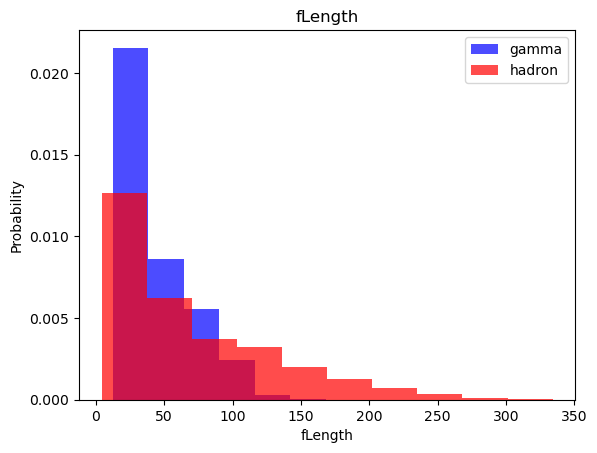

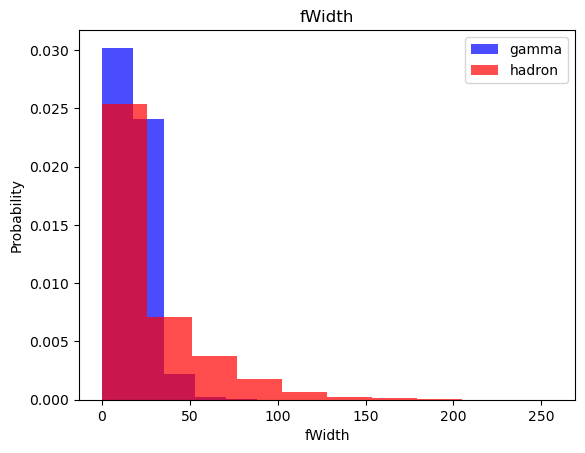

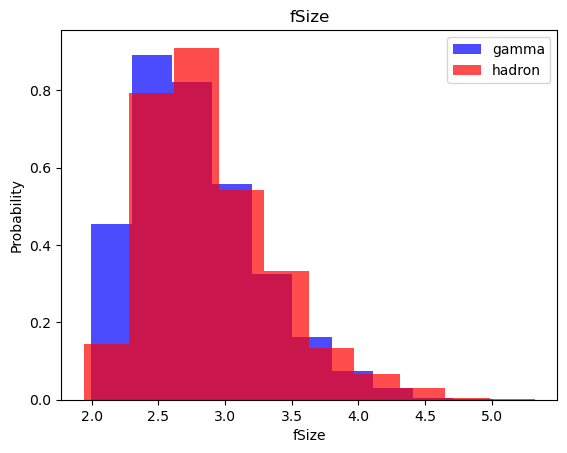

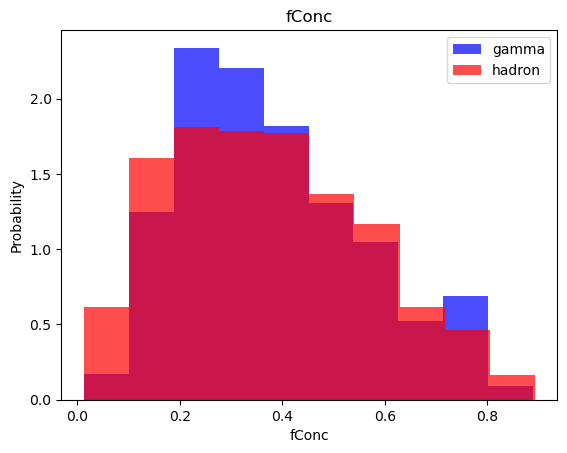

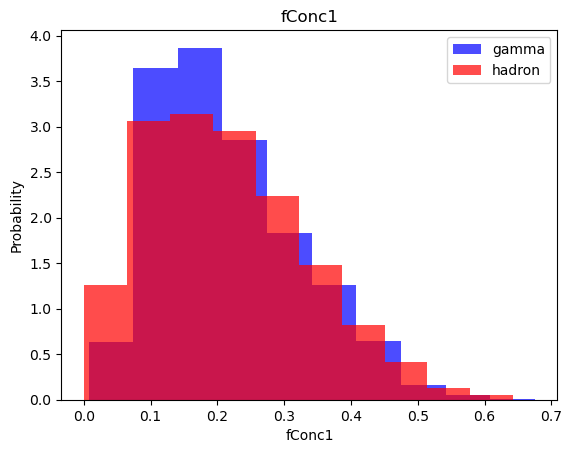

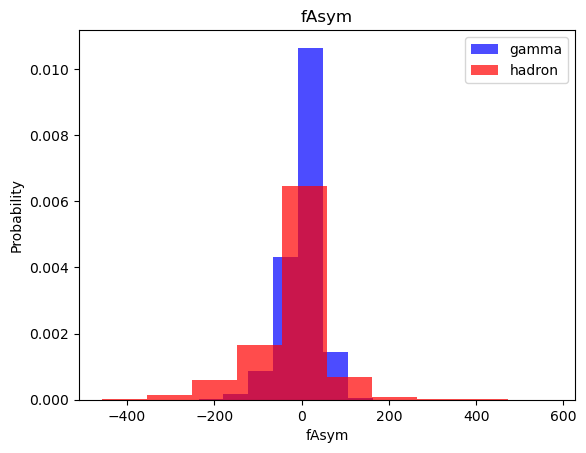

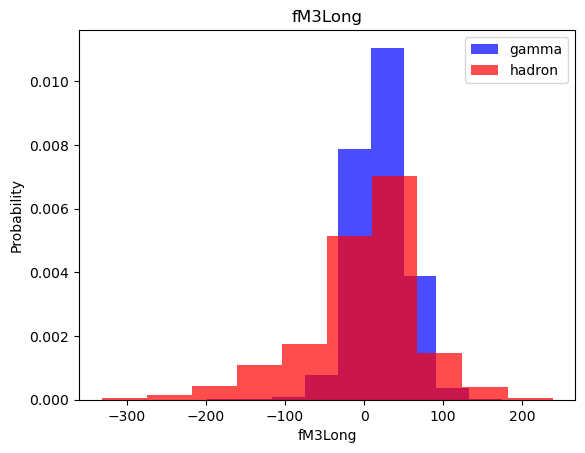

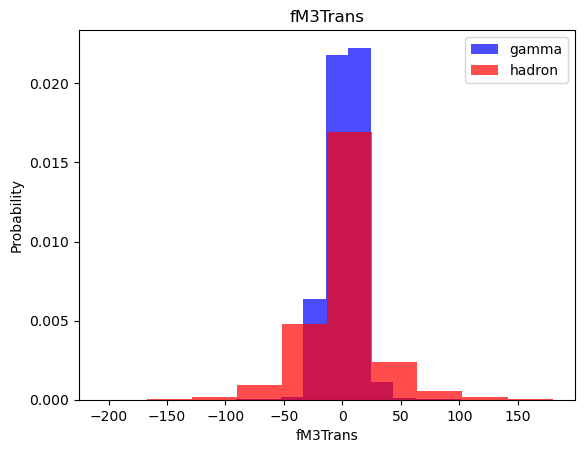

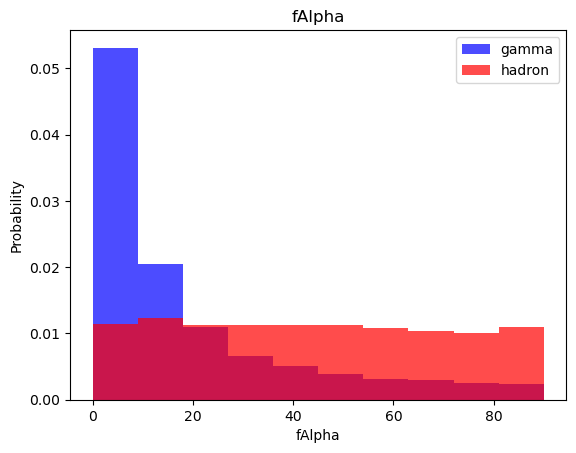

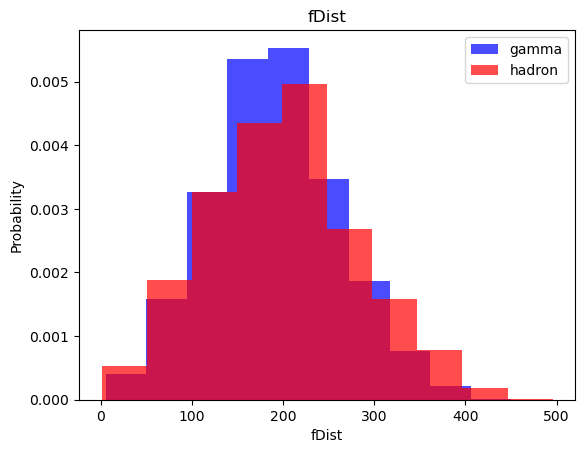

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [9]:
# Train, validation, test datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
# X : 처음부터 마지막 전까지 컬럼, y : 마지막 컬럼
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [11]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

7398
4014


In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [13]:
len(y_train)

14796

In [14]:
len(y_train == 1)

14796

# k-nearest neighbors

### 예측값 주변의 샘플값이 양이냐 음이냐에 따라 결정

# kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [19]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1350
           1       0.84      0.89      0.86      2454

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [23]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1350
           1       0.74      0.91      0.82      2454

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804



# Logistic Regression

In [24]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1350
           1       0.85      0.83      0.84      2454

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines (SVM)

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1350
           1       0.89      0.91      0.90      2454

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural net

In [30]:
import tensorflow as tf

In [31]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

In [32]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


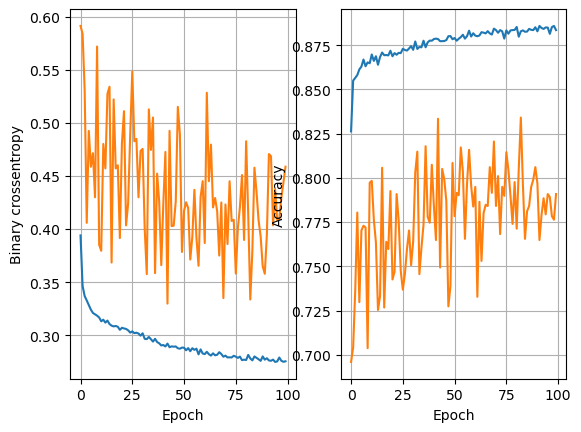

119/119 [==============================] - 0s 844us/step - loss: 0.3351 - accuracy: 0.8754


TypeError: '<' not supported between instances of 'list' and 'float'

In [33]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                    

In [ ]:
plot_loss(history)
plot_accuracy(history)